In [1]:
import itk

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage

In [151]:
i = itk.imread("data/hand (1).png.nrrd")

In [44]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 20)

In [47]:
x = np.max(np.abs(itk.GetArrayViewFromImage(i)[40:45]), axis=0)

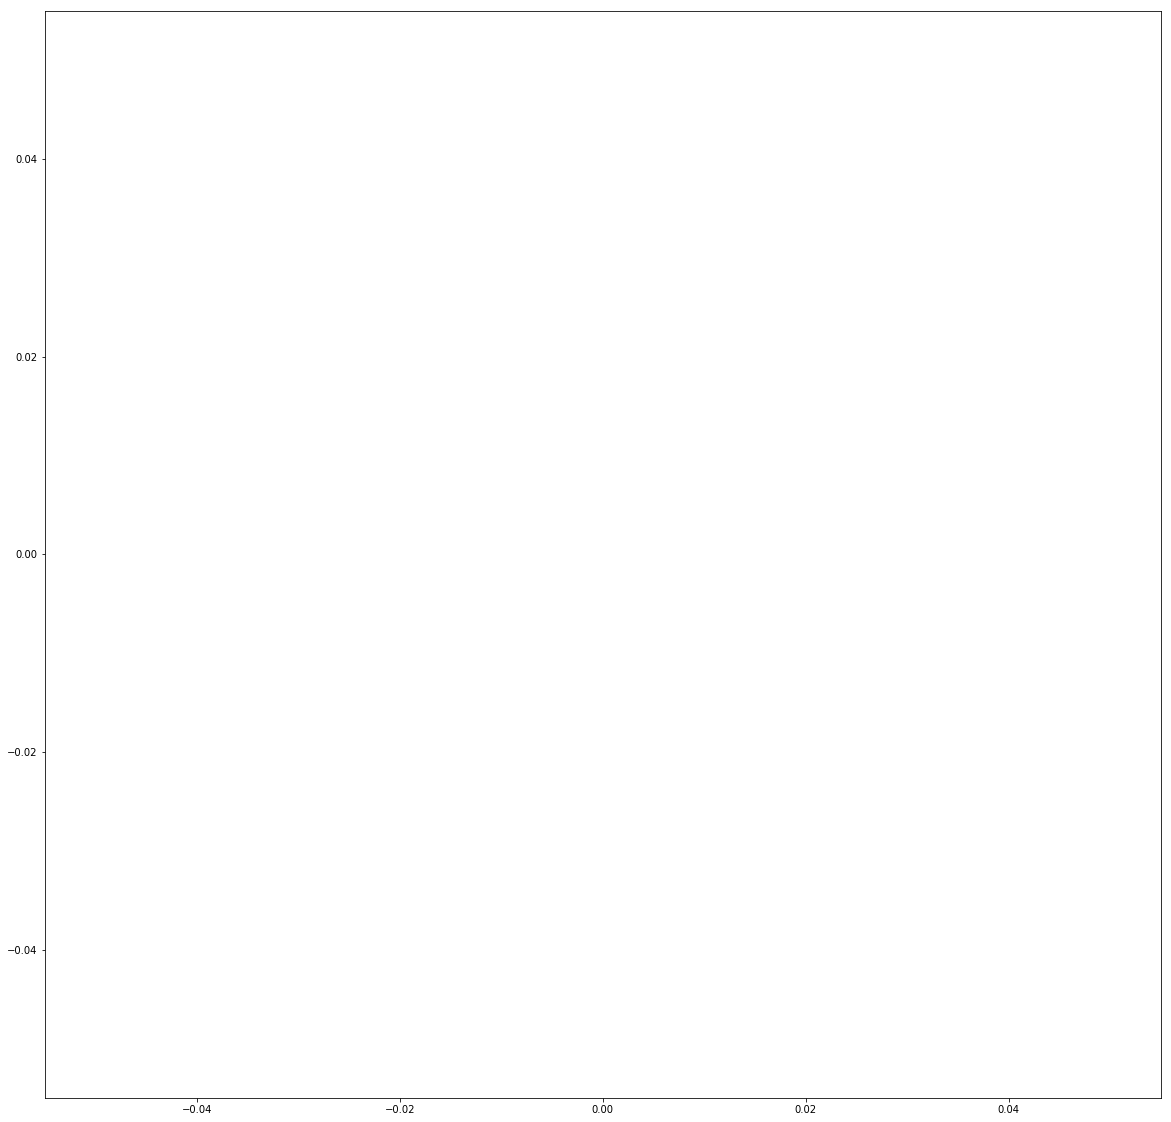

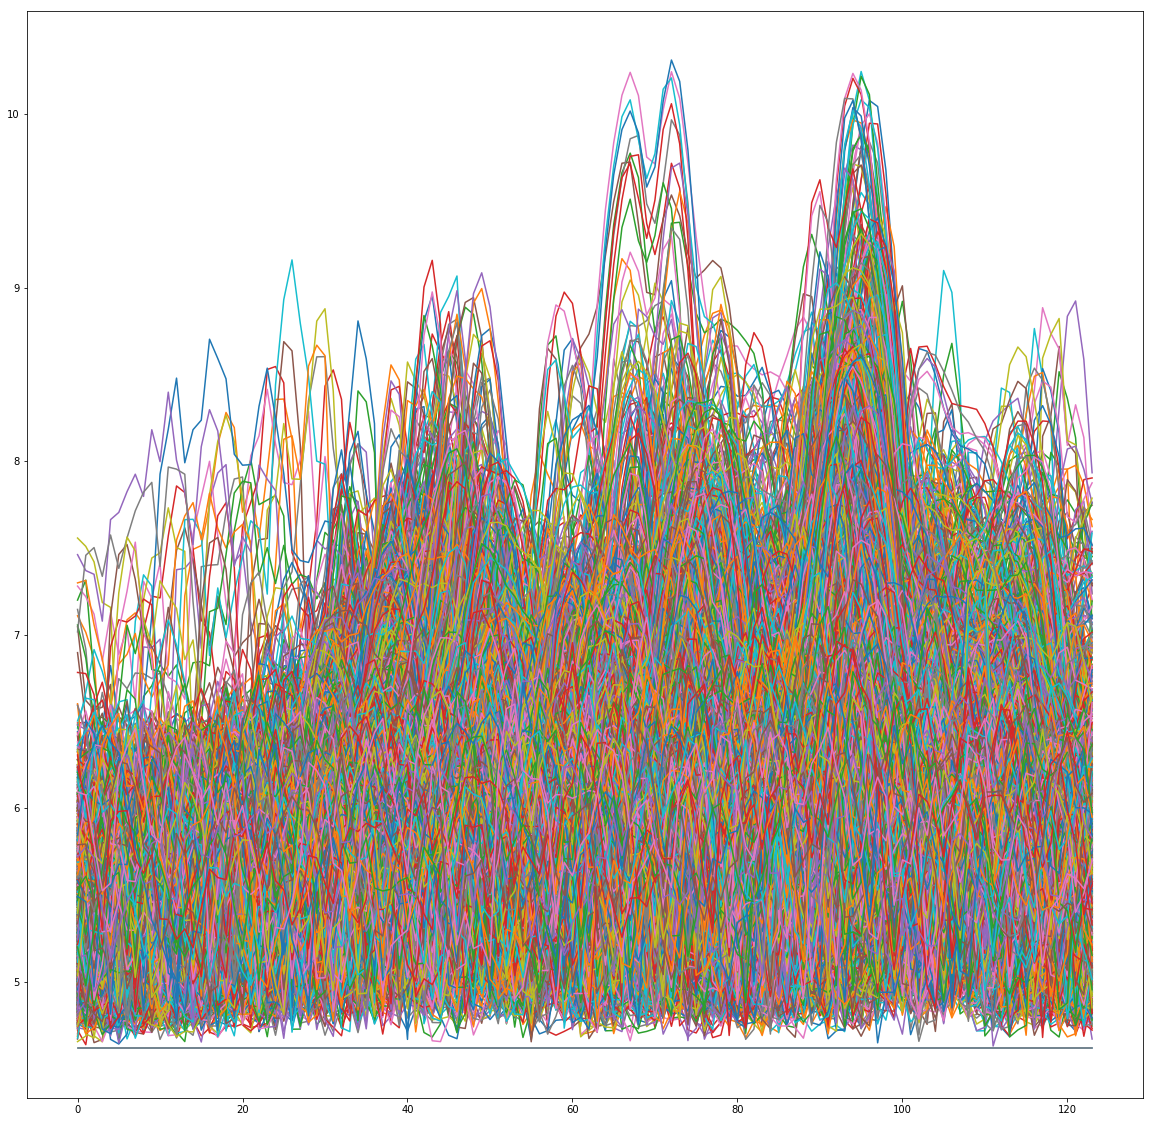

TypeError: Invalid dimensions for image data

In [152]:
z = x + 1.0

z = z - scipy.ndimage.filters.gaussian_filter1d(z, 15, 1)
plt.plot(z[50, 402:502])

z = np.convolve(z.transpose().flatten(), [-1, -2, 6, -2, -1], 'same').reshape(z.transpose().shape).transpose()
plt.plot(z[50, 402:502])


z = np.abs(z)
z = np.mean([z[:, 3:], z[:, 2:-1], z[:, 1:-2]], axis=0)
plt.plot(z[50, 400:500])

plt.show()

z = np.log(z + 101)
plt.plot(z[50])
plt.show()
z = z.transpose()
z = np.repeat(z[::4], 3, axis=1)

z = scipy.ndimage.filters.gaussian_filter(z, 1)

plt.imshow(z, cmap="gray")
plt.show()

In [18]:
z = np.convolve

In [19]:
x.shape

(127, 2048)

In [20]:
z.shape

AttributeError: 'function' object has no attribute 'shape'

In [21]:
import scipy.ndimage

Casting complex values to real discards the imaginary part


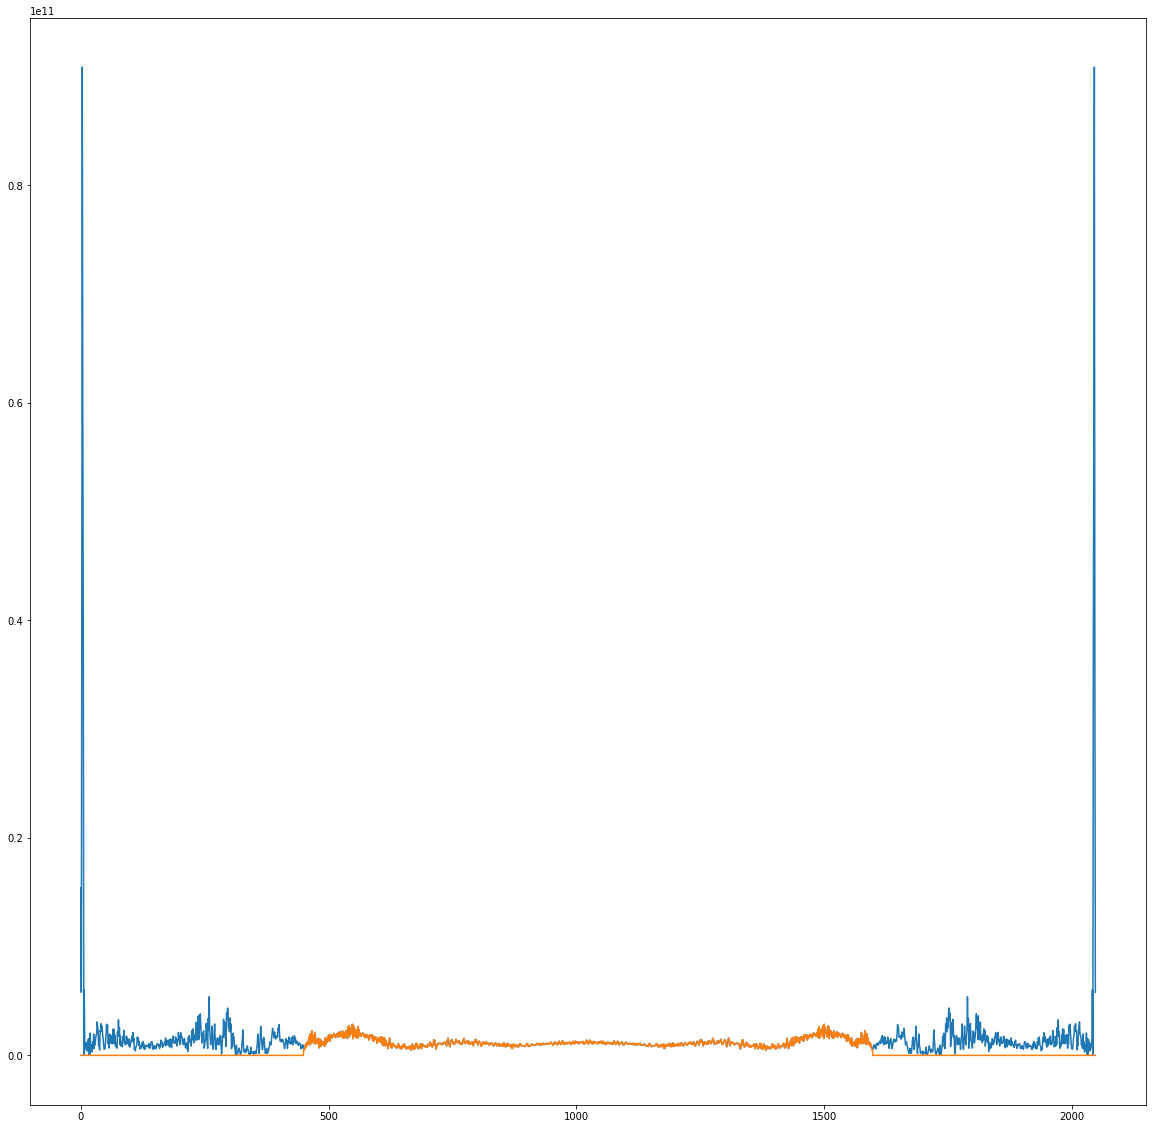

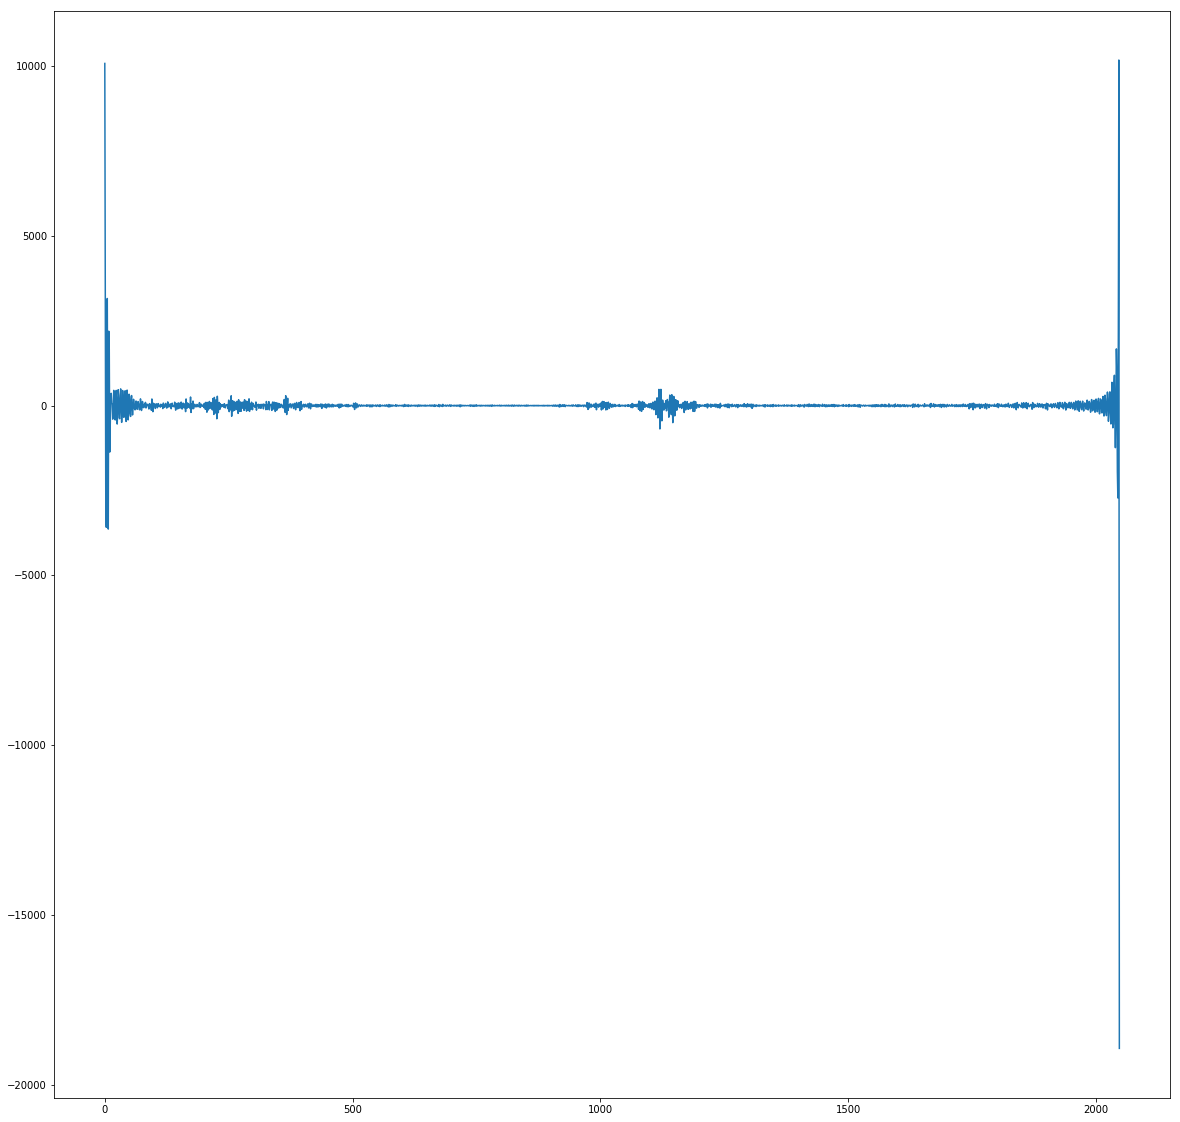

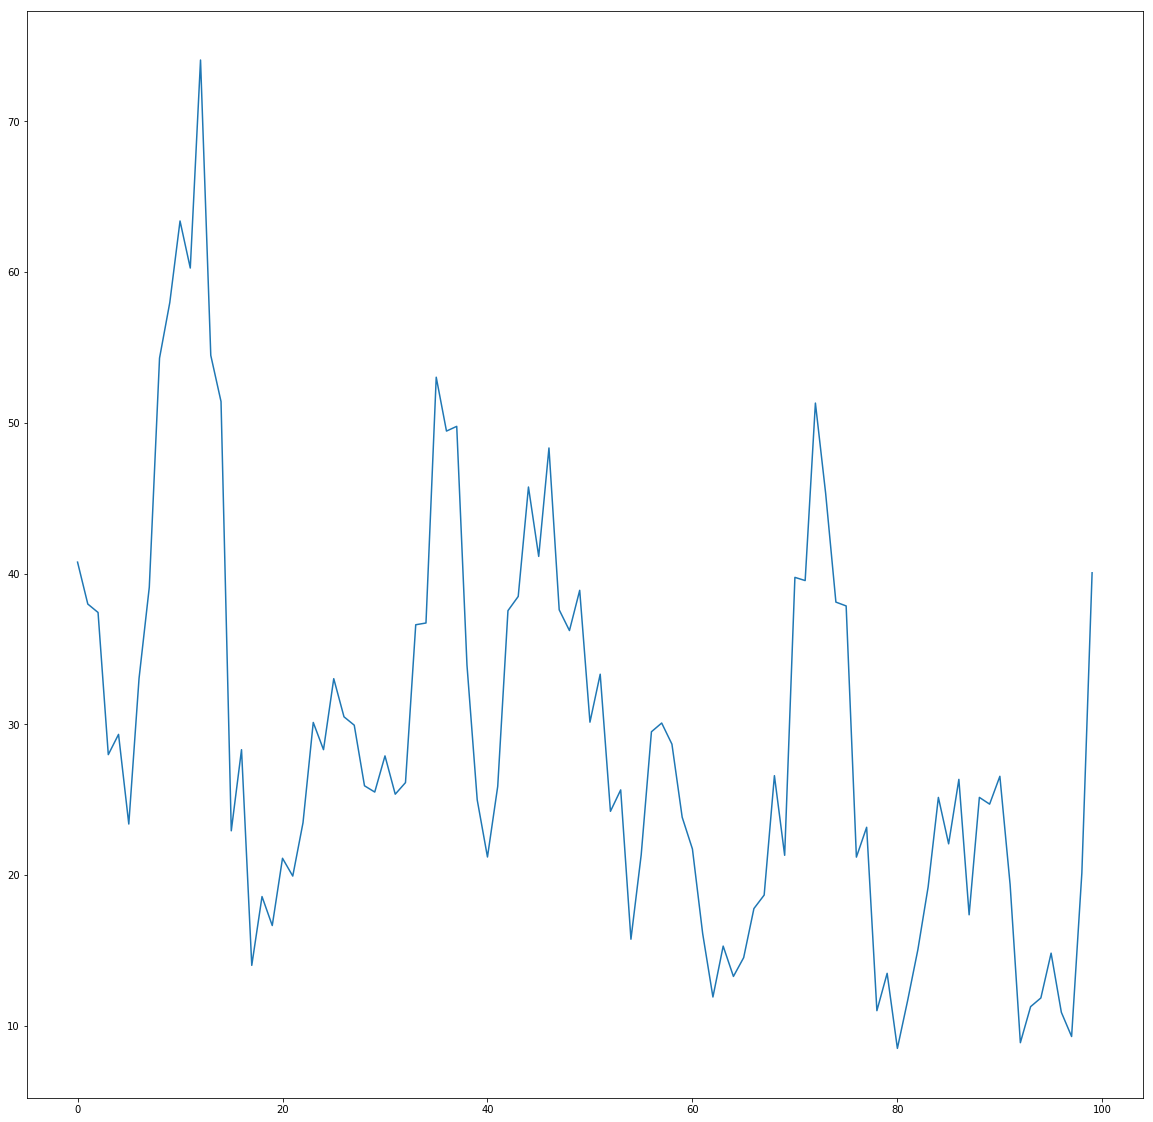

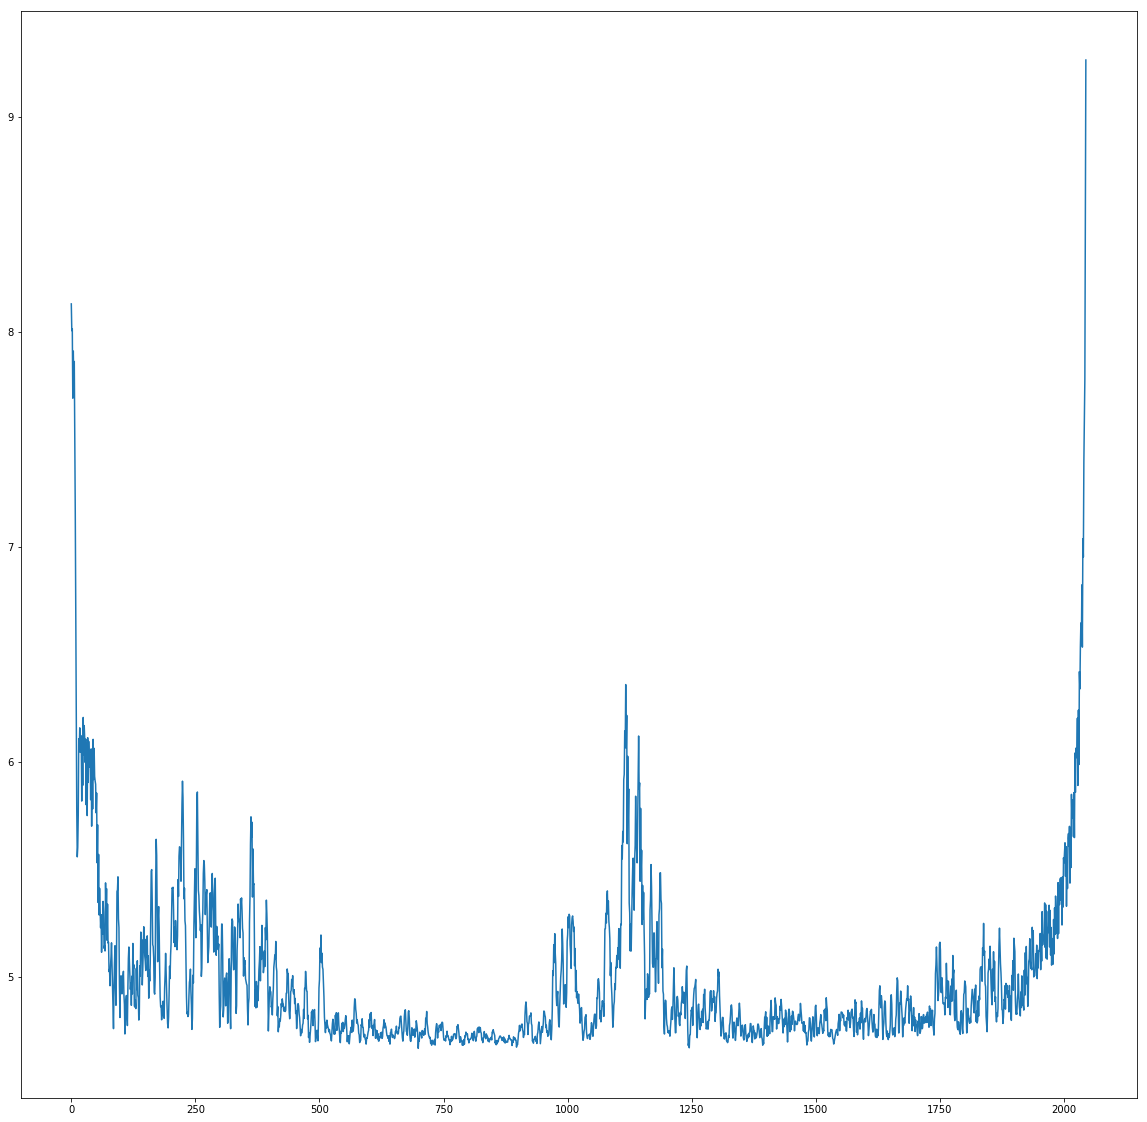

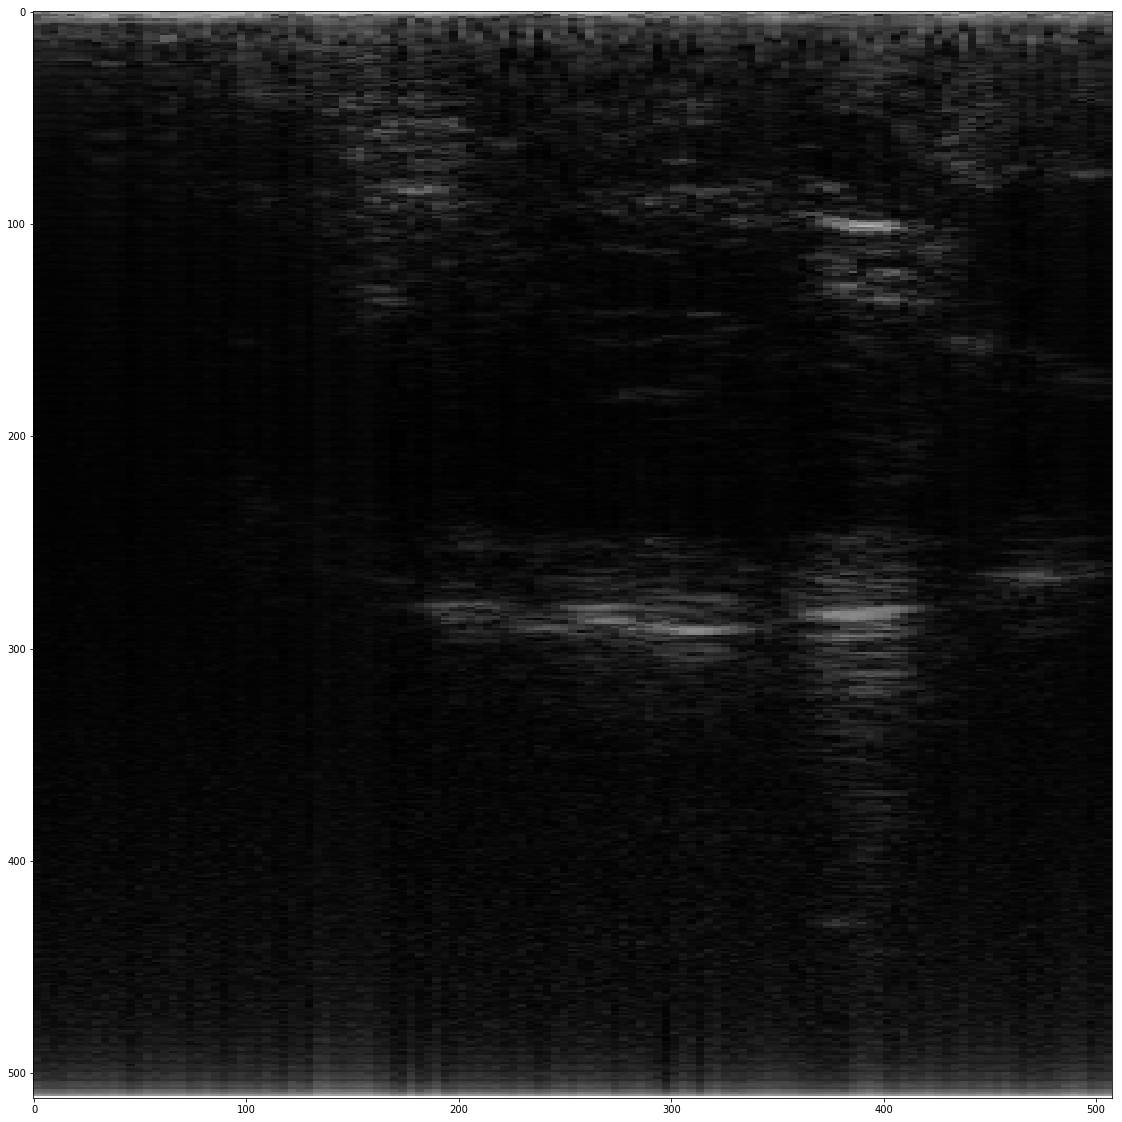

In [37]:
y = np.fft.fft(x + 1.0, axis=1)

plt.plot(y[50] * y.conj()[50])

y[:, 0:450] = 0
#y[:, 450:-450] = 0
y[:, -450:] = 0

[plt.plot(y[50] * y[50].conj())]

xx = np.fft.ifft(y, axis=1)

plt.show()

plt.plot(xx[50])
plt.show()

z = np.abs(xx)
z = np.mean([z[:, 3:], z[:, 2:-1], z[:, 1:-2]], axis=0)
plt.plot(z[50, 400:500])

plt.show()

z = np.log(z + 101)
plt.plot(z[50])
plt.show()
z = z.transpose()
z = np.repeat(z[::4], 4, axis=1)

#z = scipy.ndimage.filters.gaussian_filter(z, 2)

plt.imshow(z, cmap="gray")
plt.show()

In [38]:
from scipy.signal import hilbert

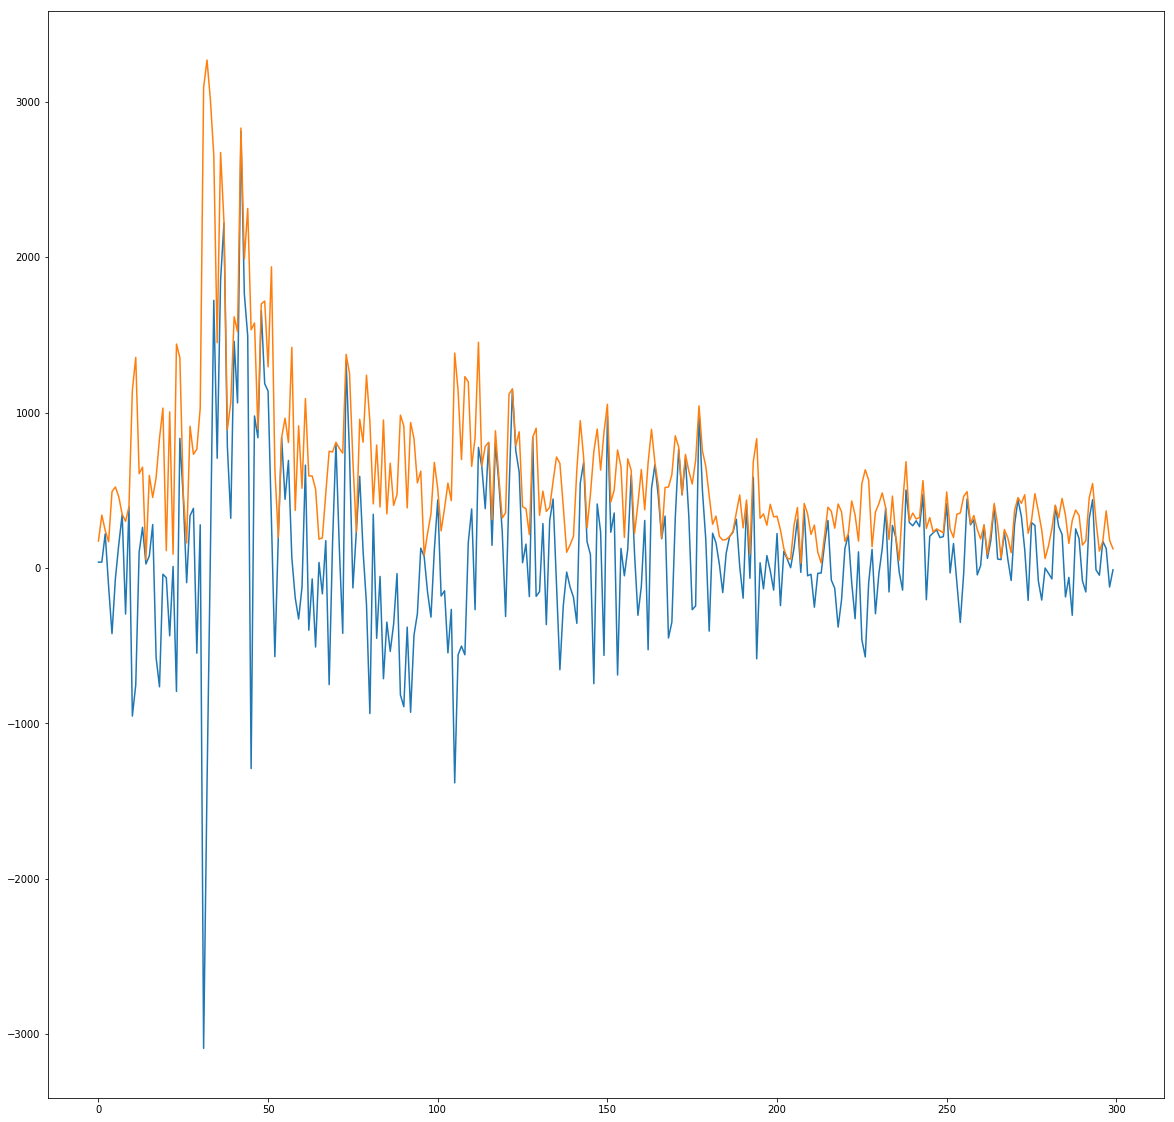

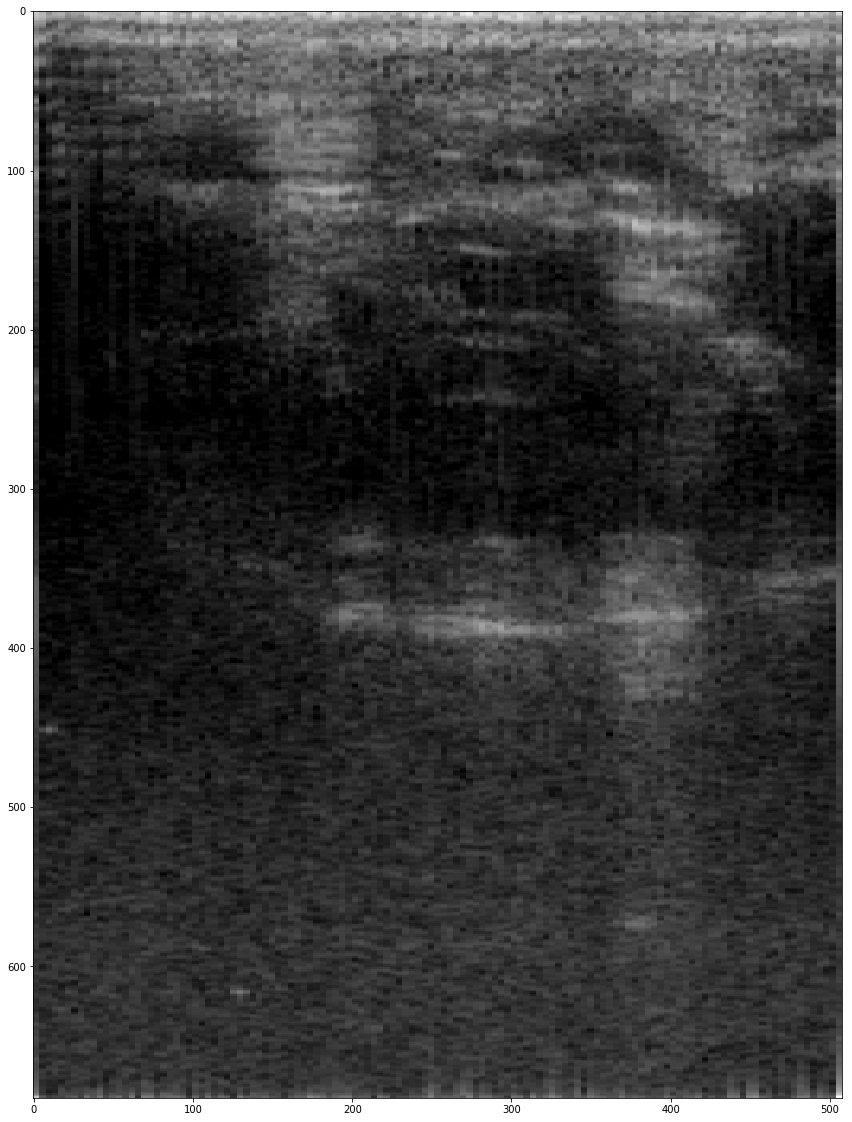

In [39]:
xx = x - scipy.ndimage.filters.gaussian_filter(x, 40)
xx = np.convolve(xx.transpose().flatten(), [-2, 4, -2], 'same').reshape(xx.transpose().shape).transpose()
zz = hilbert(xx, axis=1)

plt.plot(xx[97, 1100:1400])
plt.plot(np.abs(zz[97, 1100:1400]))
plt.show()

z = np.log(np.abs(zz) + 10)
z = z.transpose()
z = scipy.ndimage.filters.gaussian_filter1d(z, 3, axis=0)
z = np.repeat(z[::3], 4, axis=1)

#z = scipy.ndimage.filters.gaussian_filter(z, 2)

#z = z - np.mean(z, axis=1, keepdims=True)

z = np.clip(z, 4, 200)



plt.imshow(z, cmap="gray")
plt.show()

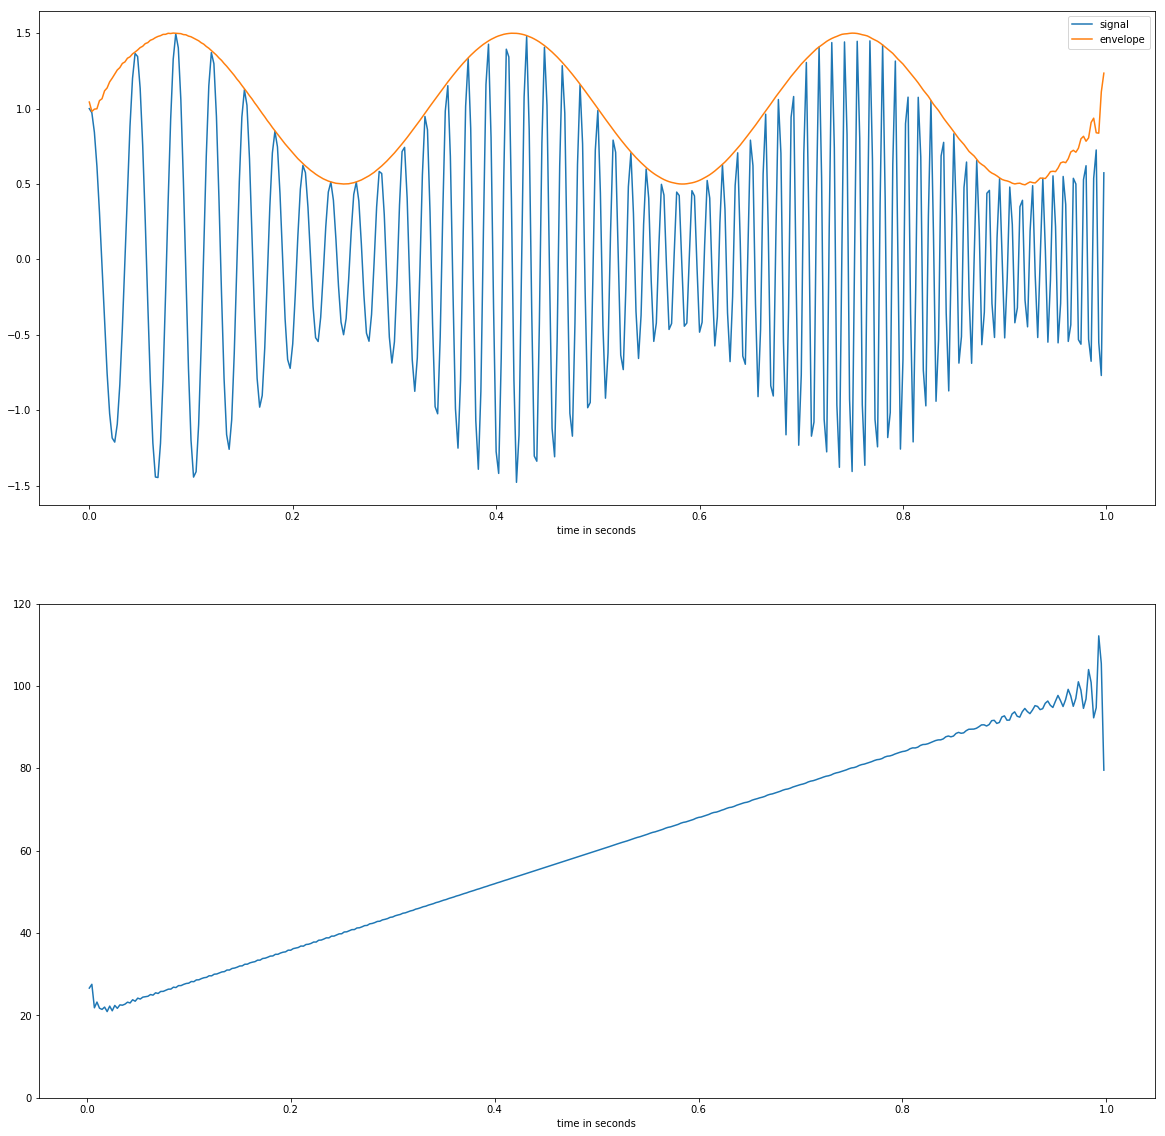

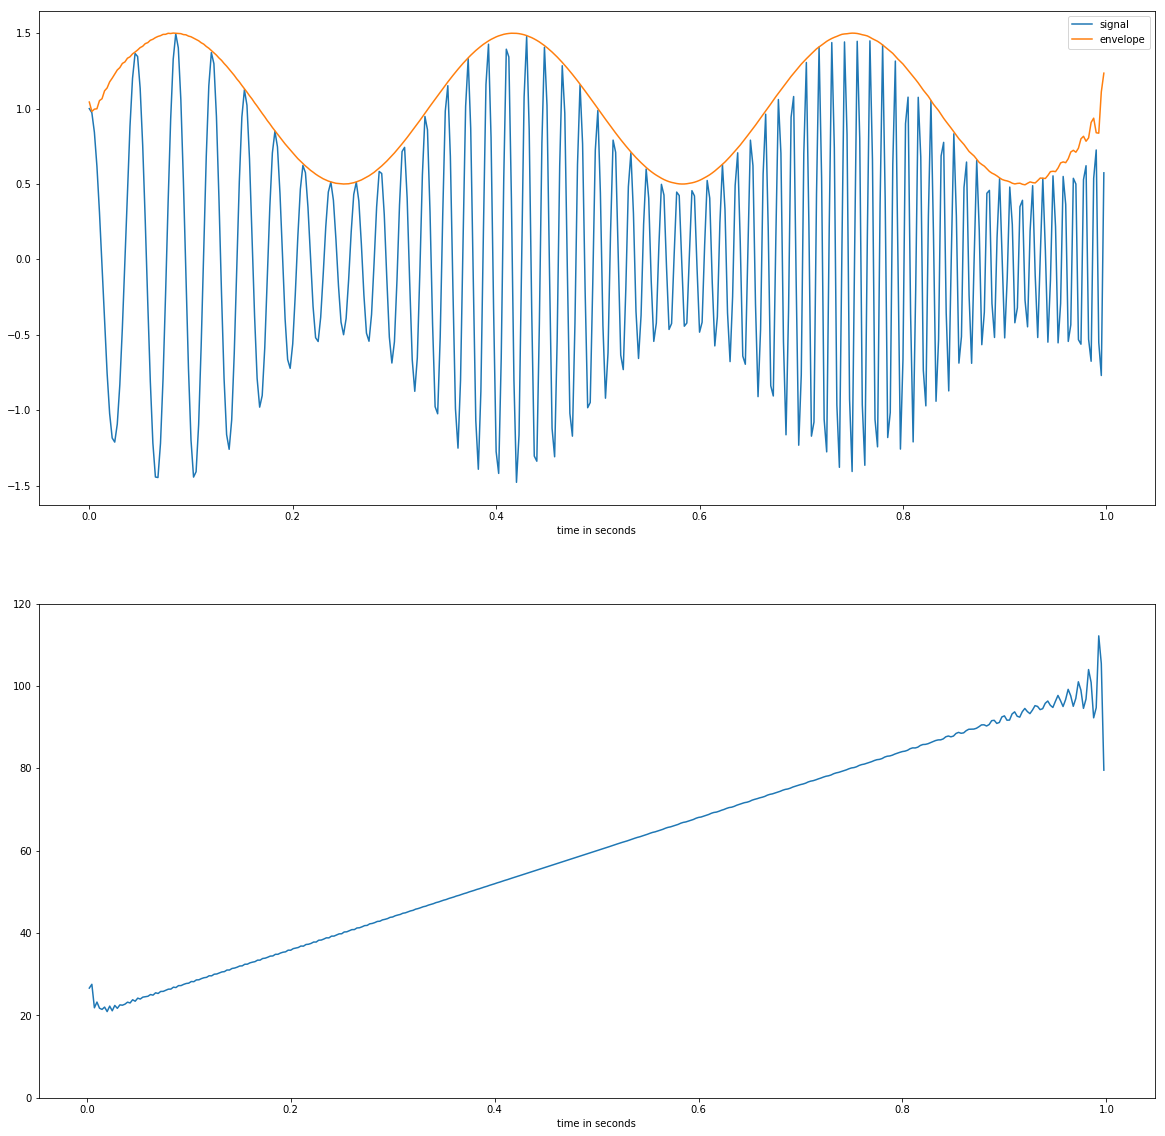

In [140]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)

fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
plt.show()

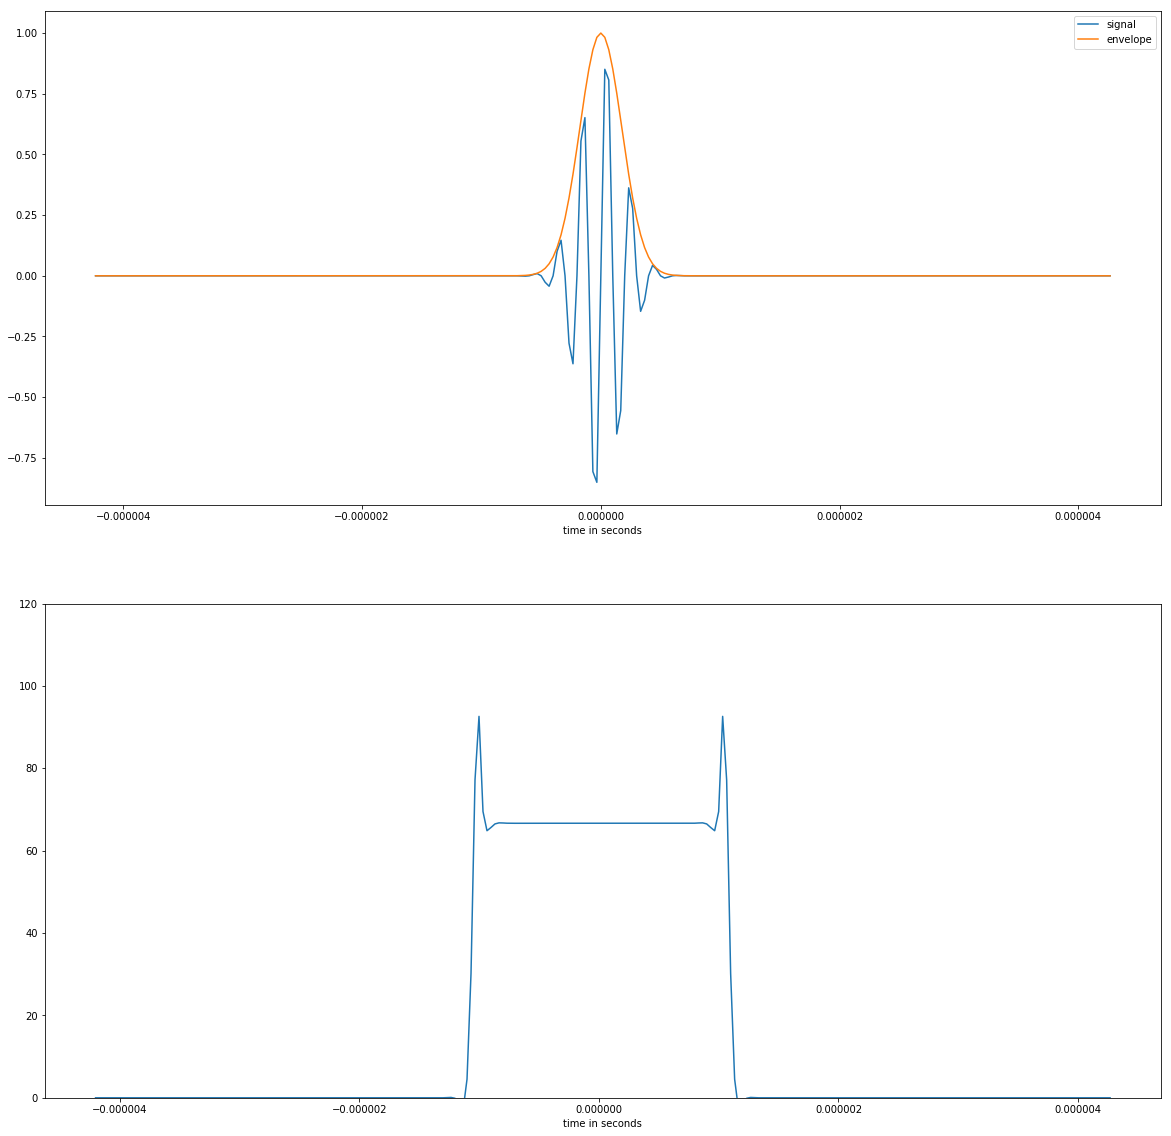

In [145]:
tstep = 1. / 30000000
t = np.linspace(-127 * tstep, 128 * tstep, 256)

carrier = np.sin(5000000 * t * 2 * np.pi)
envelope = np.e ** (-(4000000 * t)**2)

signal = carrier * envelope

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)

fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
plt.show()

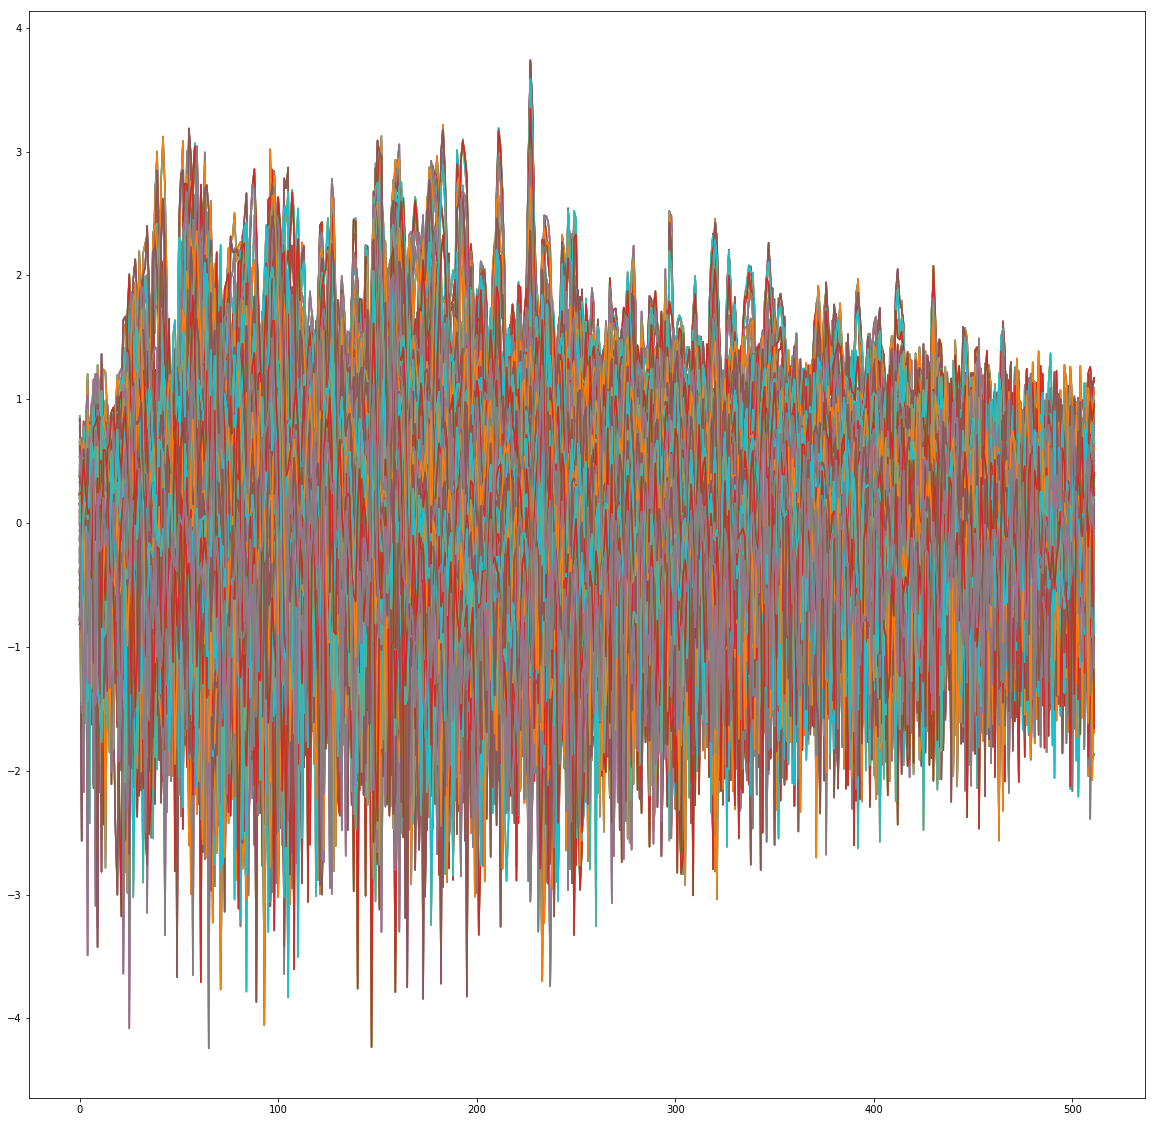

In [167]:
plt.plot(z)
plt.show()

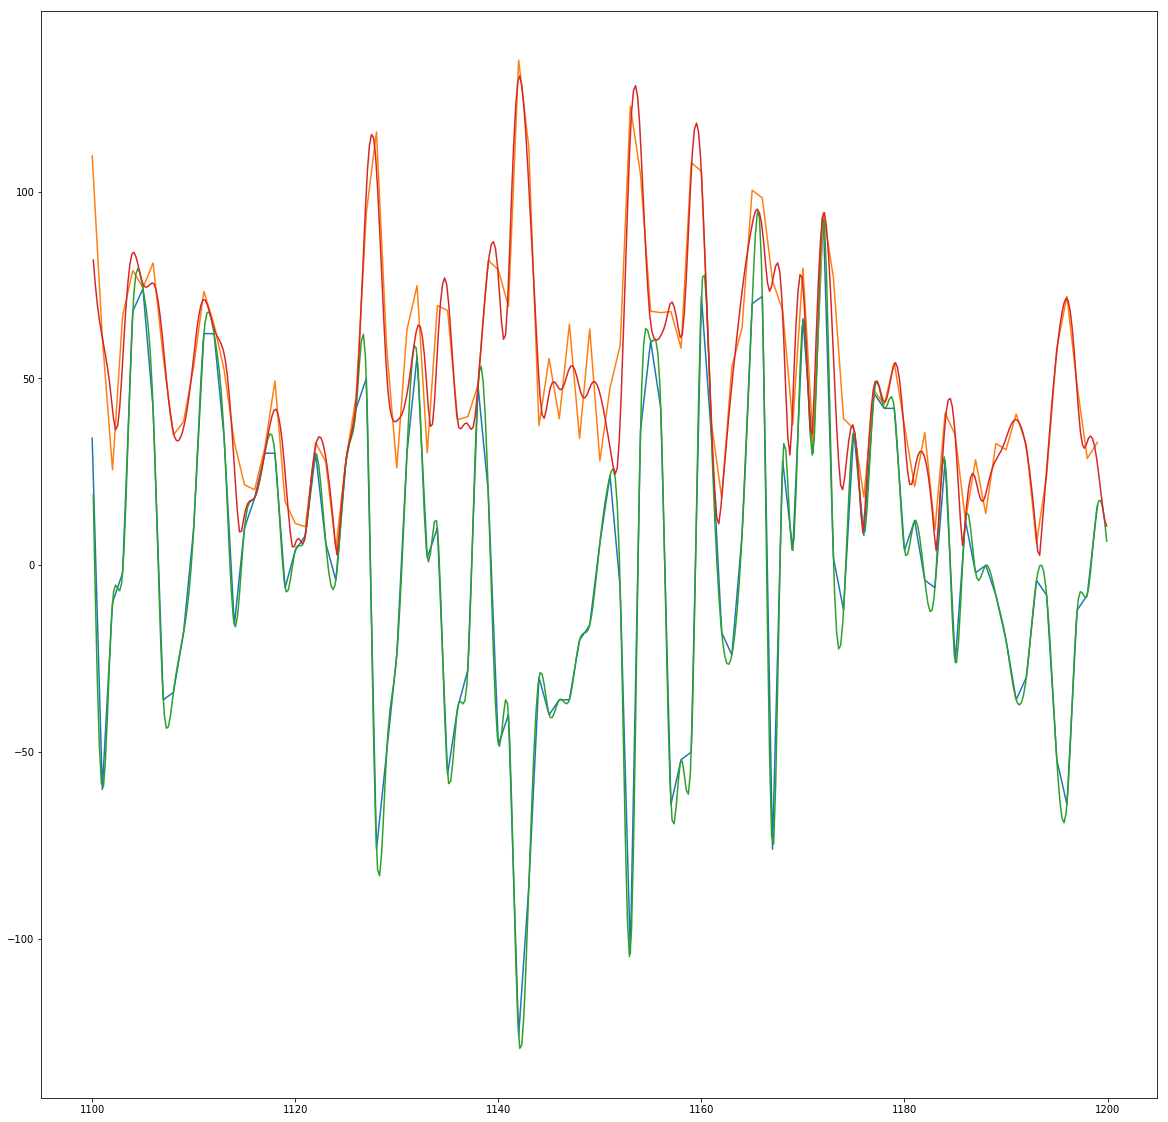

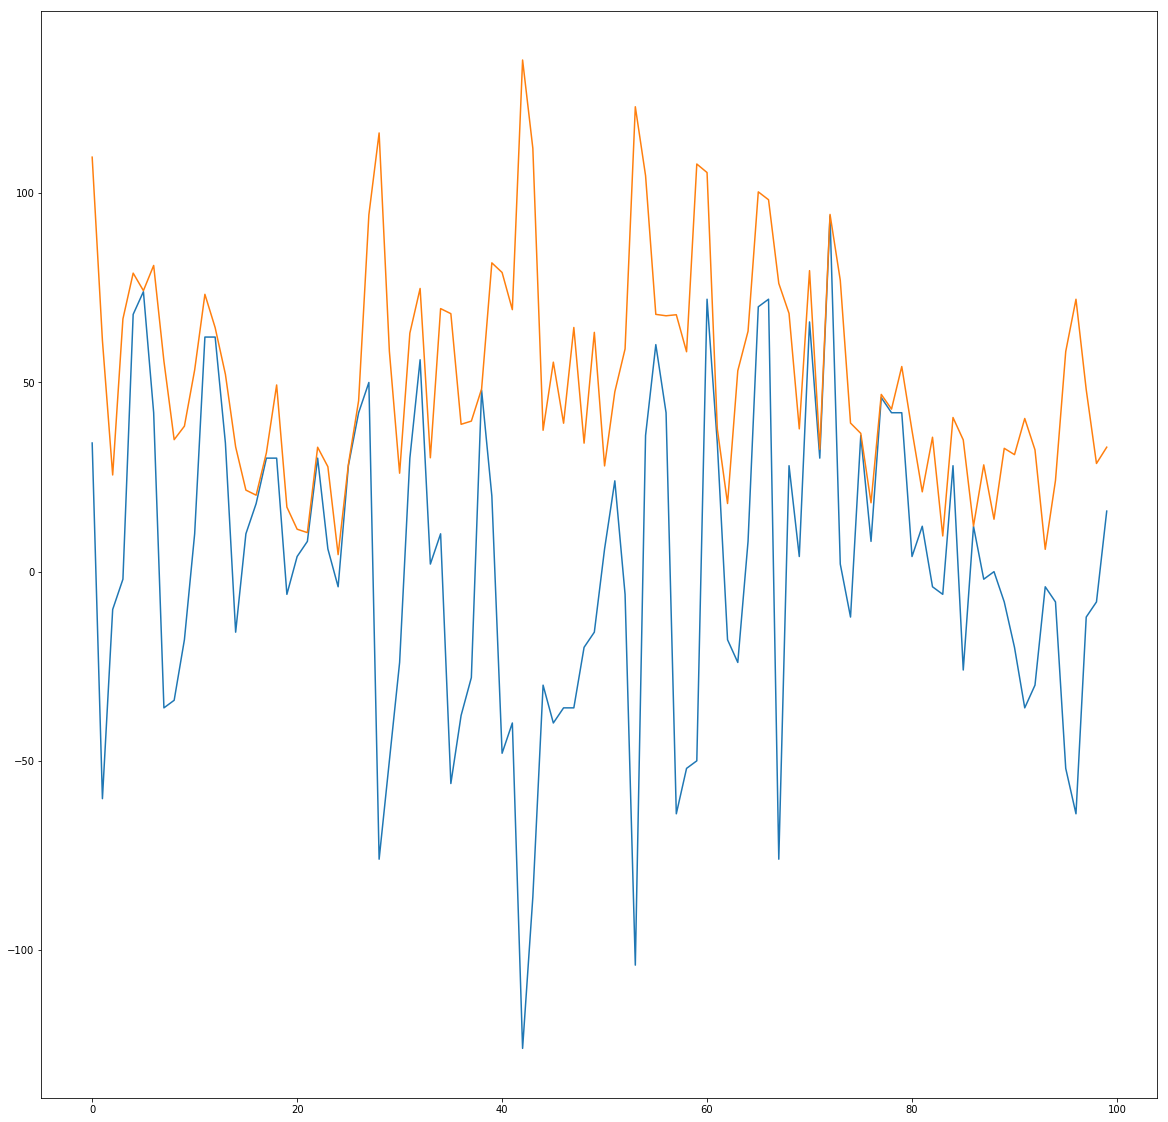

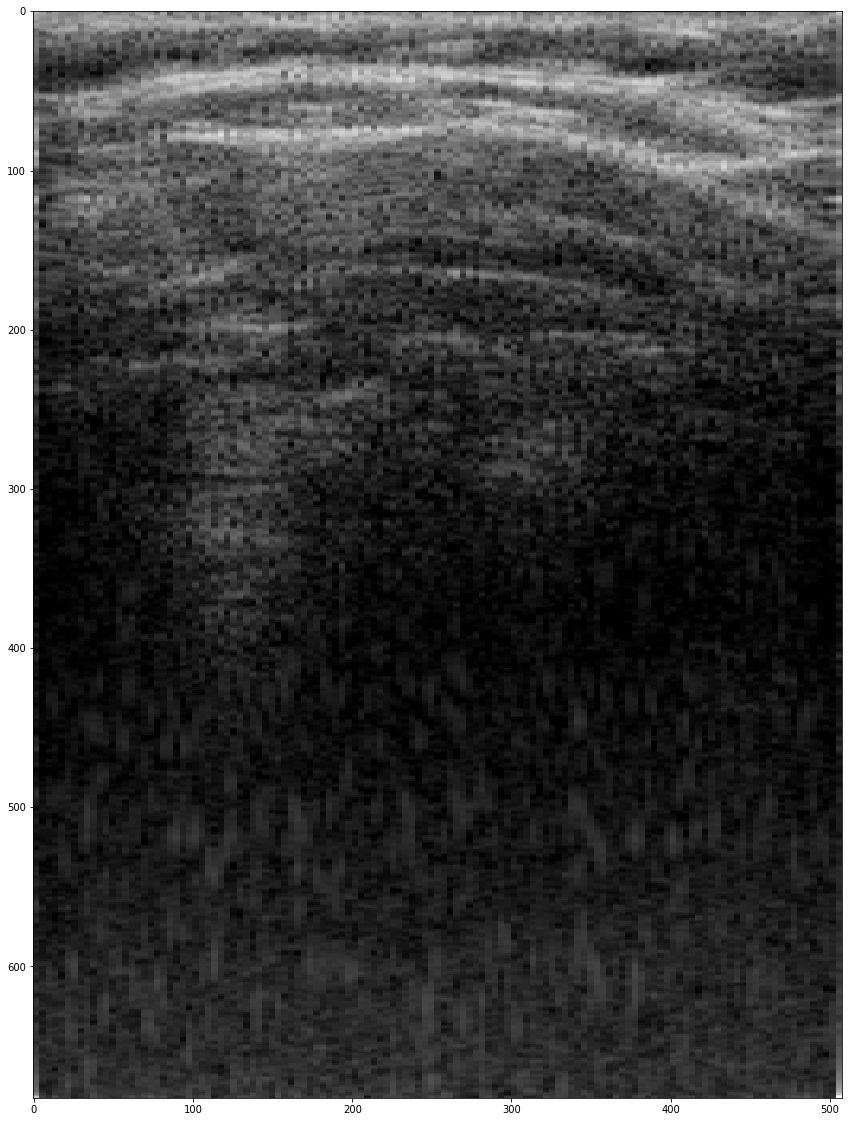

In [27]:
xx = x - scipy.ndimage.filters.gaussian_filter(x, 40)
xx = np.convolve(xx.transpose().flatten(), [-2, 4, -2], 'same').reshape(xx.transpose().shape).transpose()

t = np.arange(xx.shape[1])
t = np.expand_dims(t, 0)
t = t + 0 * xx
from scipy.interpolate import interp1d
f = interp1d(t[97], xx[97], kind="cubic")

t2 = np.linspace(t[0, 0], t[0, -1], 5 * t[0, -1])

out = f(t2)

h = hilbert(out)

plt.plot(t[97, 1100:1200], xx[97, 1100:1200])
plt.plot(t[97, 1100:1200], np.abs(hilbert(xx))[97, 1100:1200])
plt.plot(t2[5 * 1100:5 * 1200], out[5 * 1100:5 * 1200])
plt.plot(t2[5 * 1100:5 * 1200], np.abs(h[5 * 1100:5 * 1200]))
plt.show()



zz = hilbert(xx, axis=1)

plt.plot(xx[97, 1100:1200])
plt.plot(np.abs(zz[97, 1100:1200]))
plt.show()

z = np.log(np.abs(zz) + 10)
z = z.transpose()
z = scipy.ndimage.filters.gaussian_filter1d(z, 3, axis=0)
z = np.repeat(z[::3], 4, axis=1)

#z = scipy.ndimage.filters.gaussian_filter(z, 2)

#z = z - np.mean(z, axis=1, keepdims=True)

z = np.clip(z, 4, 200)



plt.imshow(z, cmap="gray")
plt.show()

In [153]:
x = itk.GetArrayViewFromImage(i)

In [131]:
x.shape

(99, 127, 2048)

In [132]:
plt.plot(np.linspace(0, 100, 50), x[0])
plt.scatter(np.linspace(0, 100, 50), x[1])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (127, 2048)

In [112]:
nu

array([[     8,   -449,   -686, ...,    -21,    -61, -32768],
       [     9,   -462,   -682, ...,    -14,    -56, -32768],
       [    10,   -469,   -675, ...,    -68,   -100, -32768],
       [    11,   -475,   -666, ...,    -16,    -57, -32768],
       [    12,   -487,   -662, ...,    -11,    -87, -32768]], dtype=int16)

In [115]:
2**16 / 2

32768.0

In [129]:
def bmode(rf):
    xx = rf - scipy.ndimage.filters.gaussian_filter(rf, 40)
    xx = np.convolve(xx.transpose().flatten(), [-2, 4, -2], 'same').reshape(xx.transpose().shape).transpose()

    t = np.arange(xx.shape[1])
    t = np.expand_dims(t, 0)
    t = t + 0 * xx
    from scipy.interpolate import interp1d
    f = interp1d(t[97], xx[97], kind="cubic")

    t2 = np.linspace(t[0, 0], t[0, -1], 5 * t[0, -1])

    out = f(t2)

    h = hilbert(out)

    #plt.plot(t[97, 1100:1200], xx[97, 1100:1200])
    #plt.plot(t[97, 1100:1200], np.abs(hilbert(xx))[97, 1100:1200])
    #plt.plot(t2[5 * 1100:5 * 1200], out[5 * 1100:5 * 1200])
    #plt.plot(t2[5 * 1100:5 * 1200], np.abs(h[5 * 1100:5 * 1200]))
    #plt.show()



    zz = hilbert(xx, axis=1)

    #plt.plot(xx[97, 1100:1200])
    #plt.plot(np.abs(zz[97, 1100:1200]))
    #plt.show()

    z = np.log(np.abs(zz) + 10)
    z = z.transpose()
    z = scipy.ndimage.filters.gaussian_filter1d(z, 3, axis=0)
    z = np.repeat(z[::3], 4, axis=1)

    #z = scipy.ndimage.filters.gaussian_filter(z, 2)

    #z = z - np.mean(z, axis=1, keepdims=True)

    z = np.clip(z, 4, 200)


    return z


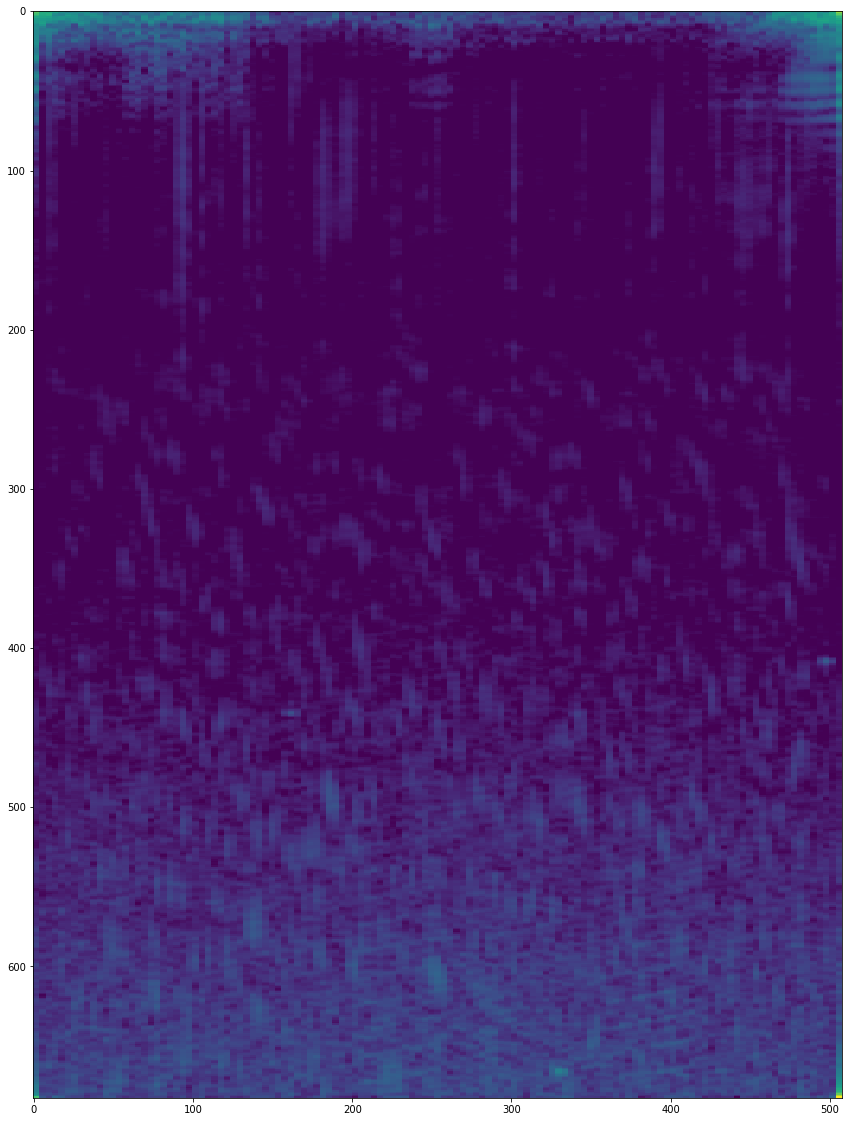

In [156]:
plt.imshow(np.sum([bmode(x[i]) for i in range(10,11)], 0))
plt.show()

In [138]:
np.sum([bmode(x[i]) for i in range(40,50)], 0)

array([[ 86.10747613,  86.10747613,  86.10747613, ...,  96.43664886,
         96.43664886,  96.43664886],
       [ 84.44014552,  84.44014552,  84.44014552, ...,  92.80218351,
         92.80218351,  92.80218351],
       [ 81.67194626,  81.67194626,  81.67194626, ...,  87.13272094,
         87.13272094,  87.13272094],
       ...,
       [ 71.13184905,  71.13184905,  71.13184905, ...,  89.05966824,
         89.05966824,  89.05966824],
       [ 77.28905261,  77.28905261,  77.28905261, ...,  96.60815571,
         96.60815571,  96.60815571],
       [ 86.49850835,  86.49850835,  86.49850835, ..., 104.07571584,
        104.07571584, 104.07571584]])